In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import shutil
from datetime import datetime

# State Data

In [2]:
api_url_data = 'https://api.covid19india.org/data.json'
r_data = requests.get(api_url_data)
data_time_series = r_data.json()

In [3]:
data_time_series.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [4]:
state_data = data_time_series.get('statewise')

In [5]:
state_list = []
confirmed_list = []
recovered_list = []
deaths_list = []
lastupdatedtime_list = []

for j in range(len(state_data)):
    confirmed = state_data[j].get('confirmed')        
    recovered = state_data[j].get('recovered')
    deaths = state_data[j].get('deaths')
    state = state_data[j].get('state')
    lastupdatedtime = state_data[j].get('lastupdatedtime')
    lastupdatedtime = lastupdatedtime[:-9]
    
    if confirmed != '0':
        confirmed_list.append(confirmed)
        recovered_list.append(recovered)
        deaths_list.append(deaths)
        state_list.append(state)
        lastupdatedtime_list.append(lastupdatedtime)

In [6]:
confirmed_list = np.array(confirmed_list, dtype = int)
recovered_list = np.array(recovered_list, dtype = int)
deaths_list = np.array(deaths_list, dtype = int)

active = np.subtract(confirmed_list, np.add(recovered_list, deaths_list))
death_rate = np.divide(deaths_list, confirmed_list)*100
recovery_rate = np.divide(recovered_list, confirmed_list)*100

death_rate_list = []
recovery_rate_list = []

for s in death_rate:
    s = round(s,1)
    death_rate_list = np.append(death_rate_list, s)
for p in recovery_rate:
    p = round(p,1)
    recovery_rate_list = np.append(recovery_rate_list, p)

In [7]:
state_data = {'States':state_list[1:], 'Confirmed':confirmed_list[1:], 'Active':active[1:], 'Recovered':recovered_list[1:], 'Deaths':deaths_list[1:], 'Recovery Rate(%)':recovery_rate_list[1:], 'Death Rate(%)':death_rate_list[1:], 'Last Updated':lastupdatedtime_list[1:]}
df_state_data = pd.DataFrame(state_data)
df_state_data.to_csv('State_data.csv')
df_state_data.to_html('State_data.html', border=3, justify = 'center', index=False)
df_state_data

,States,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%),Last Updated
0,Maharashtra,1364,1141,125,98,9.2,7.2,10/04/2020
1,Tamil Nadu,834,799,27,8,3.2,1.0,09/04/2020
2,Delhi,720,683,25,12,3.5,1.7,09/04/2020
3,Telangana,471,414,45,12,9.6,2.5,09/04/2020
4,Rajasthan,463,400,60,3,13.0,0.6,10/04/2020
5,Kerala,357,258,97,2,27.2,0.6,09/04/2020
6,Uttar Pradesh,410,375,31,4,7.6,1.0,09/04/2020
7,Andhra Pradesh,363,348,10,5,2.8,1.4,09/04/2020
8,Madhya Pradesh,411,353,25,33,6.1,8.0,09/04/2020
9,Karnataka,197,161,30,6,15.2,3.0,09/04/2020


# Case Time Plot:

In [8]:
date_list = np.array(['30 January ', '31 January ', '01 February ', '02 February ',
       '03 February ', '04 February ', '05 February ', '06 February ',
       '07 February ', '08 February ', '09 February ', '10 February ',
       '11 February ', '12 February ', '13 February ', '14 February ',
       '15 February ', '16 February ', '17 February ', '18 February ',
       '19 February ', '20 February ', '21 February ', '22 February ',
       '23 February ', '24 February ', '25 February ', '26 February ',
       '27 February ', '28 February ', '29 February ', '01 March ',
       '02 March ', '03 March ', '04 March ', '05 March ', '06 March ',
       '07 March ', '08 March ', '09 March ', '10 March ', '11 March ',
       '12 March ', '13 March ', '14 March ', '15 March ', '16 March ',
       '17 March ', '18 March ', '19 March ', '20 March ', '21 March ',
       '22 March ', '23 March ', '24 March ', '25 March ', '26 March ',
       '27 March ', '28 March ', '29 March ', '30 March ', '31 March ',
       '01 April ', '02 April ', '03 April ', '04 April ', '05 April ',
       '06 April ', '07 April ', '08 April ', '09 April '])

In [9]:
# date_list_splitted = []
# for i in date_list:
#     date_splitted = i[0:2]
#     date_list_splitted.append(date_splitted)

In [10]:
totalconfirmed_list = np.array([   1,    1,    1,    2,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    3,    3,    3,    3,    3,    5,
          6,   28,   30,   31,   34,   39,   48,   63,   70,   82,   91,
        107,  112,  127,  146,  171,  198,  258,  334,  403,  497,  571,
        657,  730,  883, 1024, 1139, 1329, 1635, 2059, 2545, 3105, 3684,
       4289, 4778, 5351, 5916, 6725])

dailyconfirmed_list = np.array([  1,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   2,   1,  22,   2,   1,   3,   5,
         9,  15,   7,  12,   9,  16,   5,  15,  19,  25,  27,  60,  76,
        69,  94,  74,  86,  73, 153, 141, 115, 190, 306, 424, 486, 560,
       579, 605, 489, 573, 565, 809])

totalrecovered_list = np.array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   1,   1,   2,   2,   2,   2,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   4,   4,   4,  10,  10,  13,  14,  15,  15,  20,  23,  23,
        23,  25,  40,  43,  50,  75,  85, 102, 137, 150, 169, 191, 230,
       286, 329, 394, 469, 565, 620])

dailyrecovered_list = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  6,  0,  3,  1,  1,  0,  5,  3,
        0,  0,  2, 15,  3,  7, 25, 10, 17, 35, 13, 19, 22, 39, 56, 43, 65,
       75, 96, 55])

totaldeceased_list = np.array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   1,   2,   2,   2,   3,   3,   4,   4,   4,
         7,   9,  10,  11,  16,  19,  24,  27,  43,  49,  56,  72,  86,
        99, 121, 137, 163, 183, 226])

dailydeceased_list = np.array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  1,  0,
        0,  3,  2,  1,  1,  5,  3,  5,  3, 16,  6,  7, 16, 14, 13, 22, 16,
       26, 20, 46])

In [11]:
total_confirmation_increased_today = confirmed_list[0] - totalconfirmed_list[-1]
total_recovery_increased_today = recovered_list[0] - totalrecovered_list[-1]
total_death_increased_today = deaths_list[0] - totaldeceased_list[-1]

In [12]:
deaths_list

array([227,  98,   8,  12,  12,   3,   2,   4,   5,  33,   6,  18,   2,
         4,  10,   5,   1,   1,   0,   0,   0,   2,   0,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   0])

In [13]:
total_data = {'Confirmed':str(confirmed_list[0]) + ' (+' + str(total_confirmation_increased_today) + ')', 'Active':active[0], 'Recovered':str(recovered_list[0]) + ' (+' + str(total_recovery_increased_today) + ')', 'Deaths':str(deaths_list[0]) + ' (+' + str(total_death_increased_today) + ')', 'Recovery Rate(%)':recovery_rate_list[0], 'Death Rate(%)':death_rate_list[0]}
df_total_data = pd.DataFrame(total_data, index=[0])
df_total_data.to_csv('total_data.csv')
df_total_data.to_html('total_data.html', border=7, justify = 'center', index=False)
df_total_data

,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%)
0,6743 (+18),5881,635 (+15),227 (+1),9.4,3.4


In [14]:
date_list = np.append(date_list,'10 April')
dailyconfirmed_list = np.append(dailyconfirmed_list, total_confirmation_increased_today)
dailyrecovered_list = np.append(dailyrecovered_list, total_recovery_increased_today)
dailydeceased_list = np.append(dailydeceased_list, total_death_increased_today)
totalconfirmed_list = np.append(totalconfirmed_list, confirmed_list[0])
totalrecovered_list = np.append(totalrecovered_list, recovered_list[0])
totaldeceased_list = np.append(totaldeceased_list, deaths_list[0])

In [15]:
date_list_splitted = []
for i in date_list:
    date_splitted = i[0:2]
    date_list_splitted.append(date_splitted)

In [16]:
day_range = 14

daily_data = {'Date':date_list[-day_range:], 'Daily Confirmations':dailyconfirmed_list[-day_range:], 'Daily Recoveries':dailyrecovered_list[-day_range:], 'Daily Deaths':dailydeceased_list[-day_range:], 'Total Confirmations':totalconfirmed_list[-day_range:], 'Total Recoveries':totalrecovered_list[-day_range:], 'Total Deaths':totaldeceased_list[-day_range:]}
df_daily_data = pd.DataFrame(daily_data)
df_daily_data.to_csv('daily_data.csv')
df_daily_data.to_html('daily_data.html', border=3, justify = 'center', index=False)
df_daily_data

,Date,Daily Confirmations,Daily Recoveries,Daily Deaths,Total Confirmations,Total Recoveries,Total Deaths
0,28 March,141,10,5,1024,85,24
1,29 March,115,17,3,1139,102,27
2,30 March,190,35,16,1329,137,43
3,31 March,306,13,6,1635,150,49
4,01 April,424,19,7,2059,169,56
5,02 April,486,22,16,2545,191,72
6,03 April,560,39,14,3105,230,86
7,04 April,579,56,13,3684,286,99
8,05 April,605,43,22,4289,329,121
9,06 April,489,65,16,4778,394,137


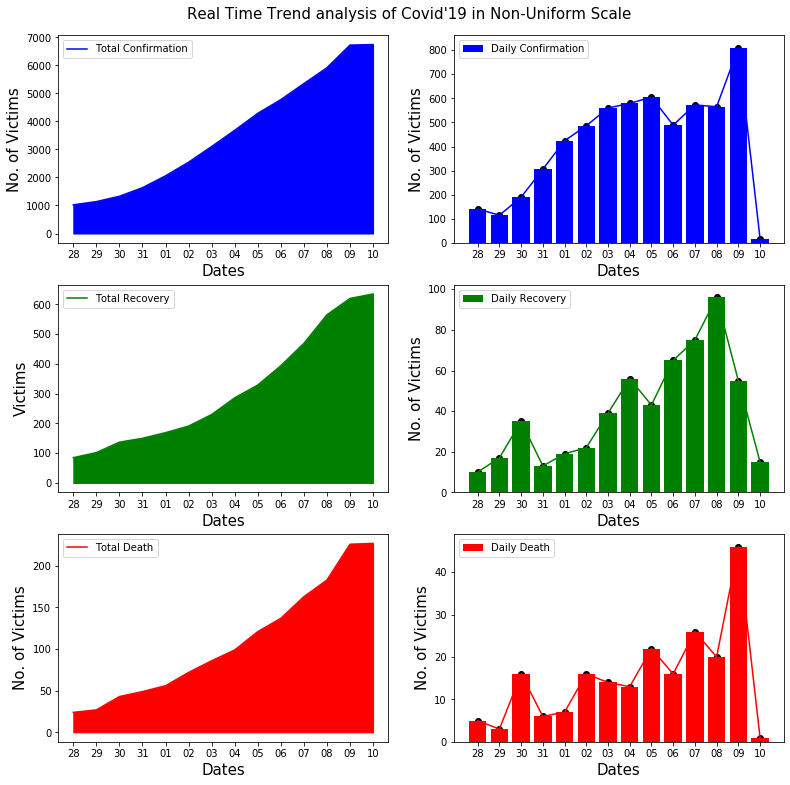

In [17]:
day_range = 14

plt.figure(figsize=(13,13))

plt.subplot(3,2,1)
plt.plot(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue', label='Total Confirmation')
# plt.scatter(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,2)
plt.bar(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue', label='Daily Confirmation')
plt.plot(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.scatter(date_list_splitted[-day_range:], dailyconfirmed_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='blue')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,3)
plt.plot(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green', label='Total Recovery')
# plt.scatter(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totalrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,4)
plt.bar(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green', label='Daily Recovery')
plt.plot(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.scatter(date_list_splitted[-day_range:], dailyrecovered_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailyrecovered_list[-day_range:], color='green')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,5)
plt.plot(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red', label='Total Death')
# plt.scatter(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='black')
plt.fill_between(date_list_splitted[-day_range:], totaldeceased_list[-day_range:], color='red')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(3,2,6)
plt.bar(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red', label='Daily Death')
plt.plot(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='red')
plt.scatter(date_list_splitted[-day_range:], dailydeceased_list[-day_range:], color='black')
# plt.fill_between(date_list[-day_range:], dailydeceased_list[-day_range:], color='black')
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.suptitle("Real Time Trend analysis of Covid'19 in Non-Uniform Scale", fontsize=15, x=0.5,y=0.91)
plt.savefig('plot1.png')

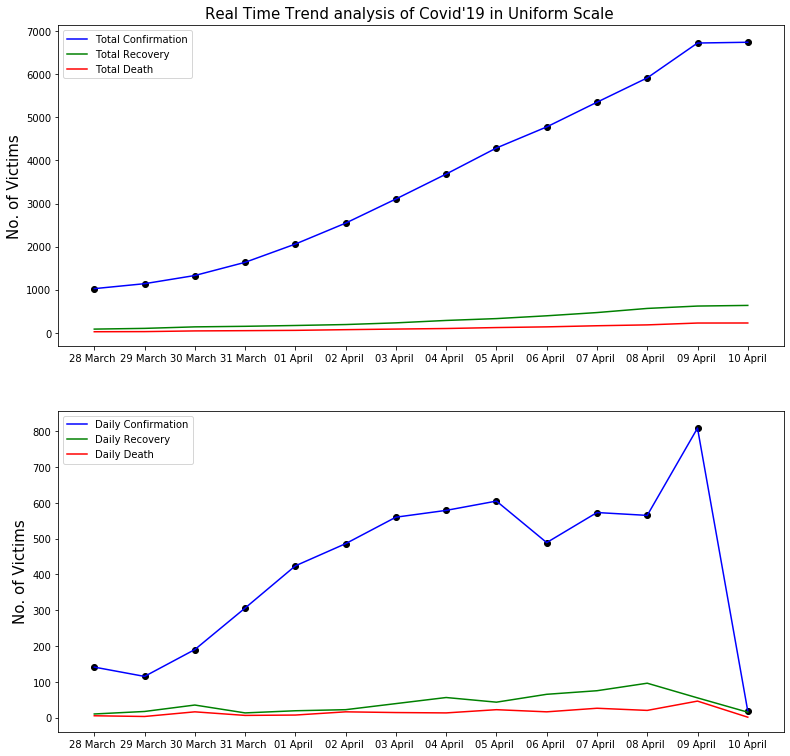

In [18]:
day_range = 14

plt.figure(figsize=(13,13))

plt.subplot(2,1,1)
plt.plot(date_list[-day_range:], totalconfirmed_list[-day_range:], color='blue', label='Total Confirmation')
plt.scatter(date_list[-day_range:], totalconfirmed_list[-day_range:], color='black')
plt.plot(date_list[-day_range:], totalrecovered_list[-day_range:], color='green', label='Total Recovery')
plt.plot(date_list[-day_range:], totaldeceased_list[-day_range:], color='red', label='Total Death')
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.subplot(2,1,2)
plt.plot(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='blue', label='Daily Confirmation')
plt.scatter(date_list[-day_range:], dailyconfirmed_list[-day_range:], color='black')
plt.plot(date_list[-day_range:], dailyrecovered_list[-day_range:], color='green', label='Daily Recovery')
plt.plot(date_list[-day_range:], dailydeceased_list[-day_range:], color='red', label='Daily Death')
plt.ylabel('No. of Victims', fontsize=15)
plt.legend()

plt.suptitle("Real Time Trend analysis of Covid'19 in Uniform Scale", fontsize=15, x=0.5,y=0.9)
plt.savefig('plot2.png')

In [19]:
time = []
for i in range(len(totalconfirmed_list)):
    time.append(i)

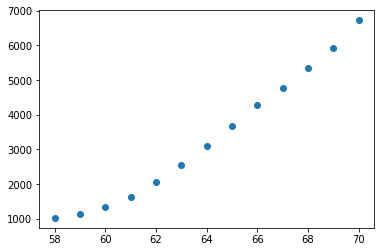

In [20]:
plt.scatter(time[-14:-1], totalconfirmed_list[-14:-1])

In [21]:
len(time) - len(time[-14:-1])

59

In [22]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

init_guess = [1,1]
popt, pcov = curve_fit(func, time[-14:-1], totalconfirmed_list[-14:-1], init_guess)

In [23]:
a = popt[0]
b = popt[1]
print(a)
print(b)

490.14835212264325
-28017.2637666184


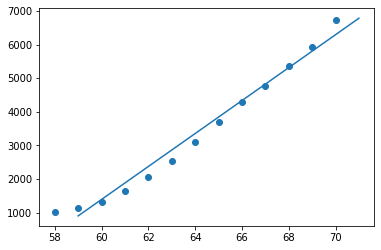

In [24]:
x_fit = np.arange(59, 59+len(time[-14:-1]))
plt.scatter(time[-14:-1], totalconfirmed_list[-14:-1])
plt.plot(x_fit, func(x_fit,a,b))

In [25]:
day = 7
x = len(time) + day
pred_daily = a*x+b
pred_daily = int(pred_daily)
pred_daily

10704

# ICMR Reports

In [26]:
report_date_list = np.array(['13/03/2020', '18/03/2020', '19/03/2020', '19/03/2020',
       '20/03/2020', '20/03/2020', '21/03/2020', '21/03/2020',
       '22/03/2020', '22/03/2020', '23/03/2020', '23/03/2020',
       '24/03/2020', '24/03/2020', '25/03/2020', '25/03/2020',
       '27/03/2020', '01/04/2020', '02/04/2020', '03/04/2020',
       '03/04/2020', '04/04/2020', '05/04/2020', '06/04/2020',
       '07/04/2020', '08/04/2020', '09/04/2020'])

totalsamplestested_list = np.array([  6500,  13125,  13316,  14175,  14376,  15404,  15701,  16911,
        16999,  18127,  18383,  20707,  20864,  22694,  22928,  25144,
        27688,  47951,  55851,  56680,  69245,  79950,  89534, 101068,
       114015, 127919, 144910])

totalpositivecases_list = np.array([  78,  150,  168,  182,  206,  236,  271,  315,  341,  396,  415,
        471,  482,  536,  539,  581,  691, 1637, 2056, 2183, 2653, 3113,
       3554, 4135, 4616, 5114, 5705])

In [27]:
reports = {"Date":report_date_list[-day_range:], "Total Sample Tested":totalsamplestested_list[-day_range:], "Total Positive Cases":totalpositivecases_list[-day_range:]}
df_reports = pd.DataFrame(reports)
df_reports.to_csv('ICMR_report_data.csv')
df_reports.to_html('ICMR_report_data.html', border=3, index=False, justify = 'center')
df_reports

,Date,Total Sample Tested,Total Positive Cases
0,24/03/2020,22694,536
1,25/03/2020,22928,539
2,25/03/2020,25144,581
3,27/03/2020,27688,691
4,01/04/2020,47951,1637
5,02/04/2020,55851,2056
6,03/04/2020,56680,2183
7,03/04/2020,69245,2653
8,04/04/2020,79950,3113
9,05/04/2020,89534,3554


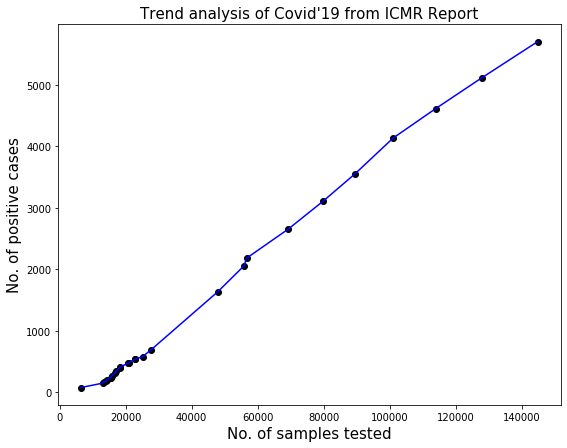

In [28]:
plt.figure(figsize = (9,7))
plt.scatter(totalsamplestested_list, totalpositivecases_list, color='black')
plt.plot(totalsamplestested_list, totalpositivecases_list, color='blue')
plt.xlabel('No. of samples tested', fontsize=15)
plt.ylabel('No. of positive cases', fontsize=15)
plt.title("Trend analysis of Covid'19 from ICMR Report", fontsize=15, y=1)
plt.savefig('ICMR_stat.png')

### Future Prediction using ICMR Data

In [29]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

init_guess = [1,1]
popt, pcov = curve_fit(func, totalsamplestested_list, totalpositivecases_list, init_guess)
a = popt[0]
b = popt[1]

In [30]:
location = ['USA', 'Italy', 'Germany', 'South Korea']
test_world = [1762032, 721732, 918460, 466804]
conf_world = [367758, 132547, 103375, 10331]
validation = totalsamplestested_list[-5:]

In [31]:
y_pred = []
for items in test_world:
    pred = a*items + b
    y_pred.append(pred)

In [32]:
y_pred = np.array(y_pred, dtype=int)
y_pred

array([76172, 30962, 39511, 19883])

In [33]:
test_report_comparison = {'Location':location, 'Total Confirmed Cases':conf_world, 'Total samples Tested':test_world}
df_test_report_comparison = pd.DataFrame(test_report_comparison)
df_test_report_comparison.to_csv('test_report_comparison.csv')
df_test_report_comparison.to_html('test_report_comparison.html', border=7, index=False, justify = 'center')
df_test_report_comparison

,Location,Total Confirmed Cases,Total samples Tested
0,USA,367758,1762032
1,Italy,132547,721732
2,Germany,103375,918460
3,South Korea,10331,466804


In [34]:
usa_vs_india_loc = ['USA', 'India']
usa_vs_india_conf = [conf_world[0], y_pred[0]]

italy_vs_india_loc = ['Italy', 'India']
italy_vs_india_conf = [conf_world[1], y_pred[1]]

germany_vs_india_loc = ['Germany', 'India']
germany_vs_india_conf = [conf_world[2], y_pred[2]]

sk_vs_india_loc = ['South Korea', 'India']
sk_vs_india_conf = [conf_world[3], y_pred[3]]

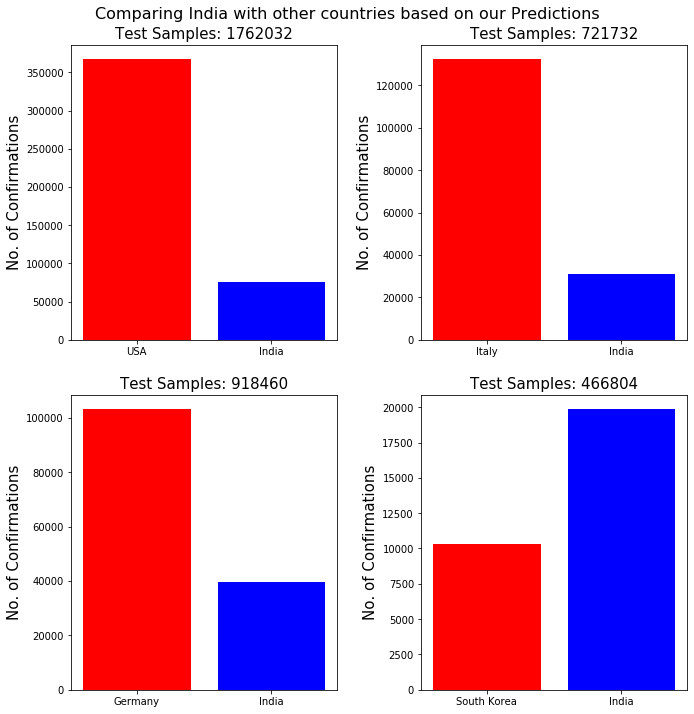

In [35]:
plt.figure(figsize=(10,10))
pad = 2.0

plt.subplot(2,2,1)
plt.bar(usa_vs_india_loc, usa_vs_india_conf, color=['red', 'blue'])
plt.title("Test Samples: "+str(test_world[0]), fontsize=15)
plt.ylabel("No. of Confirmations", fontsize=15)
plt.tight_layout(pad)

plt.subplot(2,2,2)
plt.bar(italy_vs_india_loc, italy_vs_india_conf, color=['red', 'blue'])
plt.title("Test Samples: "+str(test_world[1]), fontsize=15)
plt.ylabel("No. of Confirmations", fontsize=15)
plt.tight_layout(pad)

plt.subplot(2,2,3)
plt.bar(germany_vs_india_loc, germany_vs_india_conf, color=['red', 'blue'])
plt.title("Test Samples: "+str(test_world[2]), fontsize=15)
plt.ylabel("No. of Confirmations", fontsize=15)
plt.tight_layout(pad)

plt.subplot(2,2,4)
plt.bar(sk_vs_india_loc, sk_vs_india_conf, color=['red', 'blue'])
plt.title("Test Samples: "+str(test_world[3]), fontsize=15)
plt.ylabel("No. of Confirmations", fontsize=15)
plt.tight_layout(pad)

plt.suptitle("Comparing India with other countries based on our Predictions", fontsize=16, x=0.5,y=1)
plt.savefig('compare.png')

In [36]:
time_icmr = []
for i in range(len(report_date_list)):
    time_icmr.append(i)

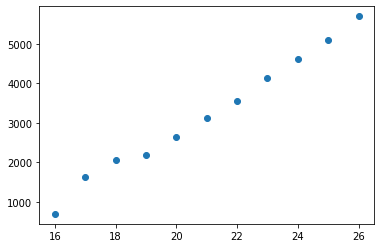

In [37]:
plt.scatter(time_icmr[-11:], totalpositivecases_list[-11:])

In [38]:
from scipy.optimize import curve_fit

def func(x,a,b):
    return a*x+b

popt, pcov = curve_fit(func, time_icmr[-11:], totalpositivecases_list[-11:])
a_icmr = popt[0]
b_icmr = popt[1]

In [39]:
print(a_icmr)
print(b_icmr)

467.8454527191759
-6601.390867810646


In [40]:
len(totalconfirmed_list[-11:])

11

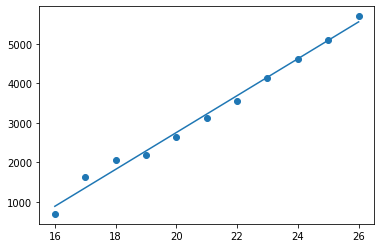

In [41]:
x_fit = np.arange(16, 16+len(time_icmr[-11:]))
plt.scatter(time_icmr[-11:], totalpositivecases_list[-11:])
plt.plot(x_fit, func(x_fit, a_icmr, b_icmr))

In [42]:
time_icmr[-1]

26

In [43]:
x = time_icmr[-1] + day
pred_icmr_ts = a_icmr*x + b_icmr
pred_icmr_ts = int(pred_icmr_ts)
pred_icmr_ts

8837

In [44]:
pred_daily

10704

In [45]:
data_source = ['Data of Confirmations from Media & Govt. Websites', 'Data of confirmations from ICMR']
data_predict = [pred_daily, pred_icmr_ts]

In [46]:
predictions = {'Data Source':data_source, 'Prediction of Confirmations after {} days'.format(day):data_predict}
df_predictions = pd.DataFrame(predictions)
df_predictions.to_csv('pred_icmr_ts.csv')
df_predictions.to_html('pred_icmr_ts.html', border=7, justify = 'center', index=False)
df_predictions

,Data Source,Prediction of Confirmations after 7 days
0,Data of Confirmations from Media & Govt. Websites,10704
1,Data of confirmations from ICMR,8837


# West Bengal

In [47]:
wb_state_data = {'State':state_list[15], 'Confirmed':confirmed_list[15], 'Active':active[15], 'Recovered':recovered_list[15], 'Deaths':deaths_list[15], 'Recovery Rate(%)':recovery_rate_list[15], 'Death Rate(%)':death_rate_list[15], 'Last Updated':lastupdatedtime_list[15]}
df_wb_state_data = pd.DataFrame(wb_state_data, index=[0])
df_wb_state_data.to_csv('wb_state_data.csv')
df_wb_state_data.to_html('wb_state_data.html', border=7, justify = 'center', index=False)
df_wb_state_data

,State,Confirmed,Active,Recovered,Deaths,Recovery Rate(%),Death Rate(%),Last Updated
0,West Bengal,117,96,16,5,13.7,4.3,09/04/2020


In [48]:
api_url_state = 'https://api.covid19india.org/v2/state_district_wise.json'
r_state = requests.get(api_url_state)
data_state = r_state.json()

In [49]:
districtData = data_state[16].get('districtData')

In [50]:
district_list = []
confirmed_list_dist = []

for z in range(len(districtData)):
    district = districtData[z].get('district')
    district_list.append(district)
    confirmed = districtData[z].get('confirmed')
    confirmed_list_dist.append(confirmed)

In [51]:
confirmed_list_dist = np.array(confirmed_list_dist, dtype=int)

In [52]:
district_list[-1] = 'Others'

In [53]:
dist_data = {'Districts':district_list, 'Confirmed':confirmed_list_dist}
df_dist_data = pd.DataFrame(dist_data)
df_dist_data.to_csv('dist_data.csv')
df_dist_data.to_html('wb_data.html', border=3, index=False, justify = 'center')
df_dist_data

,Districts,Confirmed
0,Kolkata,11
1,North 24 Parganas,4
2,Nadia,5
3,Medinipur East,3
4,Kalimpong,1
5,Hooghly,1
6,Howrah,1
7,South 24 Parganas,1
8,Others,77


# West Bengal Daily

In [54]:
api_url_states_daily = 'https://api.covid19india.org/states_daily.json'
r_states_daily = requests.get(api_url_states_daily)
data_states_daily = r_states_daily.json()

In [55]:
data_states_daily.keys()

dict_keys(['states_daily'])

In [56]:
daily = data_states_daily.get('states_daily')

In [57]:
westbengal_conf_list = []
westbengal_rec_list = []
westbengal_death_list = []
westbengal_conf_date_list = []
westbengal_rec_date_list = []
westbengal_death_date_list = []

for i in range(len(daily)):
    status = daily[i].get('status')
    if status == 'Confirmed':
        westbengal_conf = daily[i].get('wb')
        conf_date = daily[i].get('date')
        conf_date = conf_date[0:-3]
        westbengal_conf_list.append(westbengal_conf)
        westbengal_conf_date_list.append(conf_date)
        
    if status == 'Recovered':
        westbengal_rec = daily[i].get('wb')
        rec_date = daily[i].get('date')
        rec_date = rec_date[0:-3]
        westbengal_rec_list.append(westbengal_rec)
        westbengal_rec_date_list.append(rec_date)
        
    if status == 'Deceased':
        westbengal_death = daily[i].get('wb')
        death_date = daily[i].get('date')
        death_date = death_date[0:-3]
        westbengal_death_list.append(westbengal_death)
        westbengal_death_date_list.append(death_date)

In [58]:
westbengal_conf_list = np.array(westbengal_conf_list, dtype=int)
westbengal_rec_list = np.array(westbengal_rec_list, dtype=int)
westbengal_death_list = np.array(westbengal_death_list, dtype=int)

In [59]:
# westbengal_conf_date_list.append('07-Apr')
# westbengal_conf_list = np.append(westbengal_conf_list, (-np.sum(westbengal_conf_list) + confirmed_list[15]))
# westbengal_rec_list = np.append(westbengal_rec_list, (-np.sum(westbengal_rec_list) + recovered_list[15]))
# westbengal_death_list = np.append(westbengal_death_list, (-np.sum(westbengal_death_list) + deaths_list[15]))

In [60]:
wb_data_daily = {'Date':westbengal_conf_date_list, 'westbengal_conf_list':westbengal_conf_list, 'westbengal_rec_list':westbengal_rec_list, 'westbengal_death_list':westbengal_death_list}
df_wb_data_daily = pd.DataFrame(wb_data_daily)
df_wb_data_daily.to_csv('wb_data_daily.csv')
df_wb_data_daily.to_html('wb_data_daily.html', border=3, index=False, justify = 'center')
df_wb_data_daily

,Date,westbengal_conf_list,westbengal_rec_list,westbengal_death_list
0,14-Mar,0,0,0
1,15-Mar,0,0,0
2,16-Mar,0,0,0
3,17-Mar,1,0,0
4,18-Mar,0,0,0
5,19-Mar,0,0,0
6,20-Mar,1,0,0
7,21-Mar,2,0,0
8,22-Mar,3,0,0
9,23-Mar,0,0,1


In [61]:
westbengal_conf_date_list_splitted = []
for dt in westbengal_conf_date_list:
    dt = dt[0:2]
    westbengal_conf_date_list_splitted.append(dt)

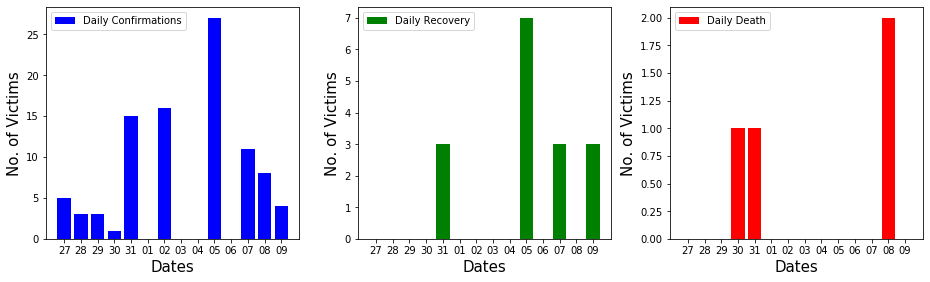

In [62]:
plt.figure(figsize = (13,4))

plt.subplot(1,3,1)
# plt.plot(westbengal_conf_date_list_splitted[-14:], westbengal_conf_list[-14:], color='blue', label="Daily Confirmations")
# plt.scatter(westbengal_conf_date_list_splitted[-14:], westbengal_conf_list[-14:], color='black')
plt.bar(westbengal_conf_date_list_splitted[-day_range:], westbengal_conf_list[-day_range:], color='blue', label="Daily Confirmations")
plt.legend()
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.tight_layout(1)

plt.subplot(1,3,2)
plt.bar(westbengal_conf_date_list_splitted[-day_range:], westbengal_rec_list[-day_range:], color='green', label="Daily Recovery")
plt.legend()
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.tight_layout(1)

plt.subplot(1,3,3)
plt.bar(westbengal_conf_date_list_splitted[-day_range:], westbengal_death_list[-day_range:], color='red', label="Daily Death")
plt.legend()
plt.xlabel('Dates', fontsize=15)
plt.ylabel('No. of Victims', fontsize=15)
plt.tight_layout(1)

plt.savefig('westbengal.png')

# HTML

In [63]:
state_intro = """
<!DOCTYPE html>
<html lang="en" align="center">
<html>
   <h1>
      <title>Insights of Covid'19 in India</title>
   </h1>
   <body>
       <h1><font size="10"><u>Insights of Covid'19 in India</u></font></h1>
       <h3>
"""

v = open("state_intro.html","w")
v.write(state_intro)
v.close()

In [64]:
state_body = """
    </h3>
    <body>
       <br>Get the live information about the Novel Corona Virus spread in India. <br />
       <br>Click <a href="https://telegra.ph/Data-Sources-for-Covidtracker-indiaml-04-05"> here</a> to get the list of the data source.
   </body>
   <h3>
   </h3>
"""

f = open("state_body.html","w")
f.write(state_body)
f.close()

In [65]:
icmr_intro = """
<br>
<br>
   <h2>
      <u>Data of last 14 days from the tests conducted by Indian Council of Medical Research(ICMR)</u>
   </h2>
"""

l = open("icmr_intro.html","w")
l.write(icmr_intro)
l.close()

In [66]:
icmr_stat = """
    <body>
        <br><img src="ICMR_stat.png" alt="ICMR Stat"/>
    </body>
"""

w = open("icmr_stat.html","w")
w.write(icmr_stat)
w.close()

In [67]:
future_prediction_intro = """
<h2><u>Predicting the Future of India using Statistical Analysis</u></h2>
<body>
    <b>The below predictions are completely based on the daily data of confirmed cases from Media & Govt. Websites and the data from ICMR.
    <br>If the current situation doesn't change with time, then these following predictions can be made.</b>
</body>
<br>
<br>
"""

fpi = open("future_prediction_intro.html","w")
fpi.write(future_prediction_intro)
fpi.close()

In [68]:
future_prediction_body = """
<body>
    <br>The above prediction using the data from ICMR is based on time but now, predicting the Total Number of Confirmations based on Total number of samples tested.
    <br>Using the data from ICMR, a linear statistical model is predicting the number of confirmations in India based on Total Number of Samples Tested.
    <br>The predictions are made by considering the current situation of India doesnot change with respect to time.
    <br>
    <br>If ICMR tests <b>""" + str(test_world[0]) + """</b> samples, then India may have approximately <b>""" + str(y_pred[0]) + """</b> confirmed cases, compared to <b>""" + str(location[0]) + """</b> which has approximately <b>""" + str(conf_world[0]) + """</b> confirmed cases.
    <br>If ICMR tests <b>""" + str(test_world[1]) + """</b> samples, then India may have approximately <b>""" + str(y_pred[1]) + """</b> confirmed cases, compared to <b>""" + str(location[1]) + """</b> which has approximately <b>""" + str(conf_world[1]) + """</b> confirmed cases.
    <br>If ICMR tests <b>""" + str(test_world[2]) + """</b> samples, then India may have approximately <b>""" + str(y_pred[2]) + """</b> confirmed cases, compared to <b>""" + str(location[2]) + """</b> which has approximately <b>""" + str(conf_world[2]) + """</b> confirmed cases.
    <br>If ICMR tests <b>""" + str(test_world[3]) + """</b> samples, then India may have approximately <b>""" + str(y_pred[3]) + """</b> confirmed cases, compared to <b>""" + str(location[3]) + """</b> which has approximately <b>""" + str(conf_world[3]) + """</b> confirmed cases.
    <br>
    <br>From these above predictions, let's have a look at how good or bad India is fighting against The Novel Corona Virus.
    <br>
    <br><img src="compare.png" alt="Comparison"/>
</body>
"""

ai_body = open("future_prediction_body.html","w")
ai_body.write(future_prediction_body)
ai_body.close()

In [69]:
state_stat_intro = """
<br>
    <h2>
      <u>Real Time Analysis of the trend of Covid'19 spread in India using the data of last 14 days</u>
    </h2>
"""

o = open("state_stat_intro.html","w")
o.write(state_stat_intro)
o.close()

In [70]:
state_stat = """
    <body>
      <br><img src="plot1.png" alt="Different Scale"/>
      <img src="plot2.png" alt="Normalized Scale"/>
   </body>
"""

g = open("state_stat.html","w")
g.write(state_stat)
g.close()

In [71]:
wb_intro = """
<br>
<br>
    <h1>
        <u>Effects of Covid'19 in West Bengal</u>
    </h1>
"""
h = open("wb_intro.html","w")
h.write(wb_intro)
h.close()

In [72]:
wb_stat = """
    <h2>
        <br><u>Analysing the trend of Covid'19 in West Bengal using the data of last 14 days</u>
        <br><img src="westbengal.png" alt="West Bengal"/>
    </h2>
"""

q = open("wb_stat.html","w")
q.write(wb_stat)
q.close()

In [73]:
end = """
    <p>
        Made by <a href="https://github.com/sudo-rajarshi">Rajarshi Bhadra</a>
    </p>
</html> 
"""
e = open("end.html","w")
e.write(end)
e.close()

In [79]:
now = datetime.now()
dt_string = now.strftime("%d/%m/%Y at %H:%M:%S")

with open('state_intro.html') as fp: 
    data1 = fp.read()

with open('state_body.html') as fp: 
    data2 = fp.read() 
    data2 = data2[:103] + '<br>Last updated on ' + str(dt_string) + data2[103:]
    
with open('total_data.html') as fp: 
    data3 = fp.read() 
    data3 = data3[:35] + str(' align="center"') + data3[35:]
    
with open('State_data.html') as fp: 
    data4 = fp.read() 
    data4 = "\n<br>\n" + data4[:35] + str(' align="center"') + data4[35:]
  
with open('icmr_intro.html') as fp:
    data5 = fp.read()
    
with open('ICMR_report_data.html') as fp:
    data6 = fp.read()
    data6 = data6[:35] + str(' align="center"') + data6[35:]
    
with open('icmr_stat.html') as fp:
    data7 = fp.read()
        
with open('state_stat_intro.html') as fp: 
    data8 = fp.read() 
    
with open('daily_data.html') as fp: 
    data9 = fp.read() 
    data9 = data9[:35] + str(' align="center"') + data9[35:]

with open('state_stat.html') as fp:
    data10 = fp.read()
    
with open('future_prediction_intro.html') as fp:
    data11 = fp.read()
    
with open('pred_icmr_ts.html') as fp: 
    data12 = fp.read() 
    data12 = data12[:35] + str(' align="center"') + data12[35:]
    
with open('future_prediction_body.html') as fp:
    data13 = fp.read()

with open('wb_intro.html') as fp:
    data14 = fp.read()

with open('wb_state_data.html') as fp:
    data15 = fp.read()
    data15 = data15[:35] + str(' align="center"') + data15[35:]

with open('wb_data.html') as fp:
    data16 = fp.read()
    data16 = "\n<br>\n" + data16[:35] + str(' align="center"') + data16[35:]

with open('wb_stat.html') as fp:
    data17 = fp.read()
    
with open('end.html') as fp:
    end_data = fp.read()

    
data = data1 + data2 + data3 + data4 + data5 + data6 + data7 + data8 + data9 + data10 + data11 + data12 + data13 + end_data
  
with open ('index.html', 'w') as fp: 
    fp.write(data) 

# Check for Errors:

### Confirmation of State data and Total Data

In [80]:
# Confirmed
if np.sum(confirmed_list[1:]) == np.sum(confirmed_list[0]):
    print(True)
else:
    print(np.sum(confirmed_list[1:]))
    print(np.sum(confirmed_list[0]))

# Active
if np.sum(active[1:]) == np.sum(active[0]):
    print(True)
else:
    print(np.sum(active[1:]))
    print(np.sum(active[0]))

# Recovered
if np.sum(recovered_list[1:]) == np.sum(recovered_list[0]):
    print(True)
else:
    print(np.sum(recovered_list[1:]))
    print(np.sum(recovered_list[0]))    

# Death
if np.sum(deaths_list[1:]) == np.sum(deaths_list[0]):
    print(True)
else:
    print(np.sum(deaths_list[1:]))
    print(np.sum(deaths_list[0]))    

True
True
True
True


### Confirmation Check bewtween State Data, Total Data & Daily Data

In [81]:
# Confirmed
if totalconfirmed_list[-2] + dailyconfirmed_list[-1] == totalconfirmed_list[-1]:
    print(True)
else:
    print(totalconfirmed_list[-2] + dailyconfirmed_list[-1])
    print(totalconfirmed_list[-1])

if totalconfirmed_list[-1] == confirmed_list[0]:
    print(True)
else:
    print(totalconfirmed_list[-1])
    print(confirmed_list[0])

# Recovered
if totalrecovered_list[-2] + dailyrecovered_list[-1] == totalrecovered_list[-1]:
    print(True)
else:
    print(totalrecovered_list[-2] + dailyrecovered_list[-1])
    print(totalrecovered_list[-1])

if totalrecovered_list[-1] == recovered_list[0]:
    print(True)
else:
    print(totalconfirmed_list[-1])
    print(confirmed_list[0])

# Death
if totaldeceased_list[-2] + dailydeceased_list[-1] == totaldeceased_list[-1]:
    print(True)
else:
    print(totaldeceased_list[-2] + dailyconfirmed_list[-1])
    print(totaldeceased_list[-1])

if totaldeceased_list[-1] == deaths_list[0]:
    print(True)
else:
    print(totaldeceased_list[-1])
    print(deaths_list[0])

True
True
True
True
True
True


### West Bengal Data

In [82]:
# Confirmed
if np.sum(westbengal_conf_list) == confirmed_list[15]:
    print(True)
else:
    print(np.sum(westbengal_conf_list))
    print(confirmed_list[15])
    
if np.sum(confirmed_list_dist) == confirmed_list[15]:
    print(True)
else:
    print(np.sum(confirmed_list_dist))
    print(confirmed_list[15])

# Recovery
if np.sum(westbengal_rec_list) == recovered_list[15]:
    print(True)
else:
    print(np.sum(westbengal_rec_list))
    print(recovered_list[15])

# Death
if np.sum(westbengal_death_list) == deaths_list[15]:
    print(True)
else:
    print(np.sum(westbengal_death_list))
    print(deaths_list[15])

103
117
104
117
True
True
